# **CS171 Final Project — Analysis & Visualization Notebook**
### Author: Hetav Vyas  

### **Purpose of This Notebook**
This notebook focuses on analyzing match-level features extracted from the Soccer Match Event Dataset

My part of the project uses this dataset to explore:

- Which event-level features differ most between winning, drawing, and losing teams
- How passing efficiency and possession relate to overall match performance
- How shooting metrics correlate with goals scored and match outcomes
- What statistical profiles “winning teams” share compared to losing teams

These visualizations help us understand how event data influences match results and provide insights for building our machine learning models that predict Win/Draw/Loss outcomes.

This notebook focuses on model application, not model training.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8")
sns.set(font_scale=1.2)

df = pd.read_csv("/Users/hetavvyas/Downloads/Project_Data/match_features_England_basic.csv")

df.head()

,matchId,teamId,total_passes,total_shots,shots_on_target,fouls_committed,tackles,clearances,successful_events,successful_passes,...,pass_success_rate,shot_accuracy,possession_ratio,opponentId,goals_for,goals_against,home_away,team_name,result,result_label
0,2499719,1609,606,27,10,9,65,19,750,513,...,0.8465,0.3704,0.9439,1631,4,3,home,Arsenal,Win,2
1,2499719,1631,230,7,4,12,82,21,370,166,...,0.7217,0.5714,0.9237,1609,3,4,away,Leicester City,Loss,0
2,2499720,1625,754,12,3,9,44,4,842,682,...,0.9045,0.2500,0.9729,1651,2,0,away,Manchester City,Win,2
3,2499720,1651,184,6,2,6,61,27,259,124,...,0.6739,0.3333,0.9388,1625,0,2,home,Brighton & Hove Albion,Loss,0
4,2499721,1610,516,15,5,18,49,6,622,454,...,0.8798,0.3333,0.9399,1646,2,3,away,Chelsea,Loss,0


In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   matchId            760 non-null    int64  
 1   teamId             760 non-null    int64  
 2   total_passes       760 non-null    int64  
 3   total_shots        760 non-null    int64  
 4   shots_on_target    760 non-null    int64  
 5   fouls_committed    760 non-null    int64  
 6   tackles            760 non-null    int64  
 7   clearances         760 non-null    int64  
 8   successful_events  760 non-null    int64  
 9   successful_passes  760 non-null    int64  
 10  eventId            760 non-null    int64  
 11  total_events       760 non-null    int64  
 12  pass_success_rate  760 non-null    float64
 13  shot_accuracy      758 non-null    float64
 14  possession_ratio   760 non-null    float64
 15  opponentId         760 non-null    int64  
 16  goals_for          760 non

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
matchId,760.0,2.499908e+06,109.768411,2.499719e+06,2.499814e+06,2.499908e+06,2.500003e+06,2.500098e+06
teamId,760.0,2.075400e+03,1941.199054,1.609000e+03,1.617500e+03,1.627500e+03,1.644500e+03,1.053100e+04
total_passes,760.0,4.324000e+02,148.777116,1.400000e+02,3.300000e+02,4.080000e+02,5.152500e+02,1.008000e+03
total_shots,760.0,1.111842e+01,5.152911,0.000000e+00,7.000000e+00,1.100000e+01,1.400000e+01,3.500000e+01
shots_on_target,760.0,3.931579e+00,2.429627,0.000000e+00,2.000000e+00,4.000000e+00,5.000000e+00,1.400000e+01
fouls_committed,760.0,1.070526e+01,3.441585,2.000000e+00,8.000000e+00,1.100000e+01,1.300000e+01,2.600000e+01
tackles,760.0,7.070000e+01,15.977817,2.900000e+01,5.900000e+01,7.000000e+01,8.100000e+01,1.350000e+02
clearances,760.0,1.550526e+01,7.877686,1.000000e+00,1.000000e+01,1.400000e+01,2.000000e+01,6.700000e+01
successful_events,760.0,5.478947e+02,149.293089,2.240000e+02,4.495000e+02,5.280000e+02,6.350000e+02,1.100000e+03
successful_passes,760.0,3.569066e+02,145.136701,9.000000e+01,2.530000e+02,3.300000e+02,4.362500e+02,9.430000e+02


# Distribution of Event Features by Match Outcome

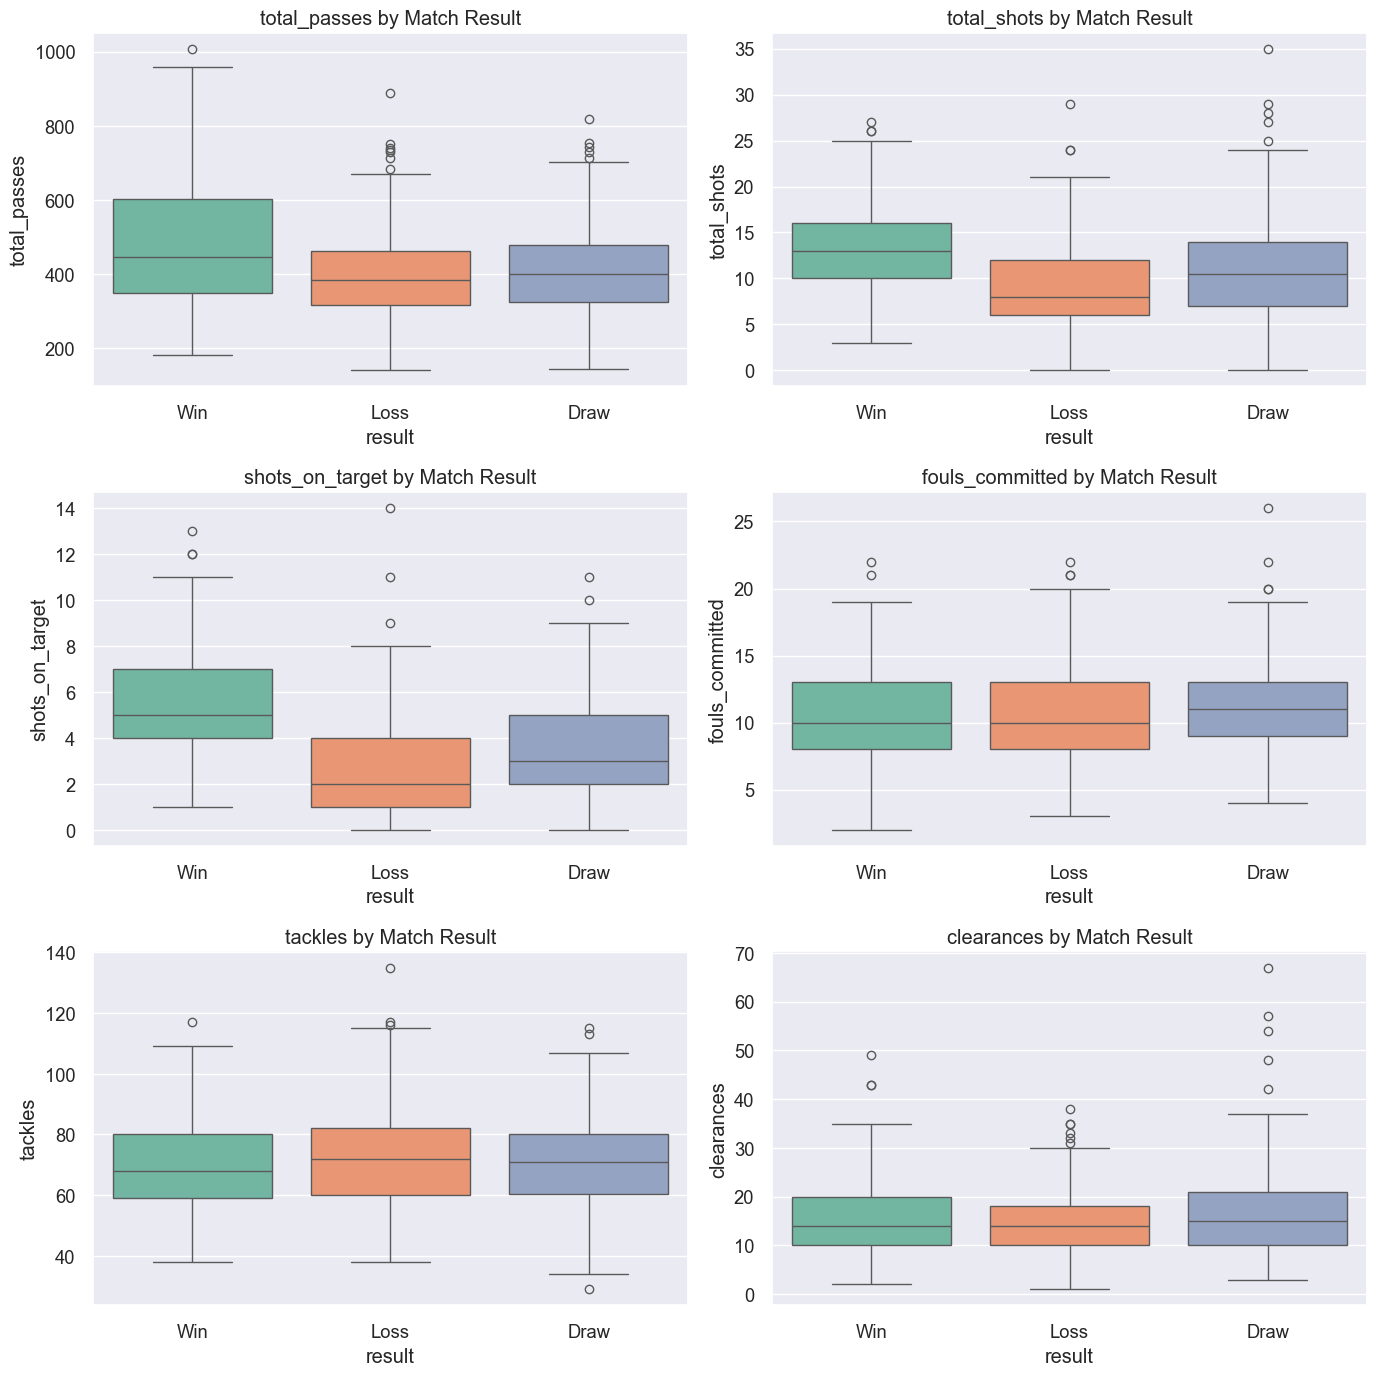

In [4]:
features_to_plot = [
    "total_passes", "total_shots", "shots_on_target",
    "fouls_committed", "tackles", "clearances"
]

fig, axes = plt.subplots(3, 2, figsize=(14, 14))
axes = axes.flatten()

for i, feature in enumerate(features_to_plot):
    sns.boxplot(
        data=df,
        x="result",
        y=feature,
        hue="result",         
        palette="Set2",
        legend=False,         
        ax=axes[i]
    )
    axes[i].set_title(f"{feature} by Match Result")

plt.tight_layout()
plt.show()

Winning teams generally produce more passes, shots, and shots on target, showing stronger attacking performance, while losing teams often record more tackles and clearances, indicating they spend more time defending under pressure.

# Event Influence: Mean Stats per Result Group

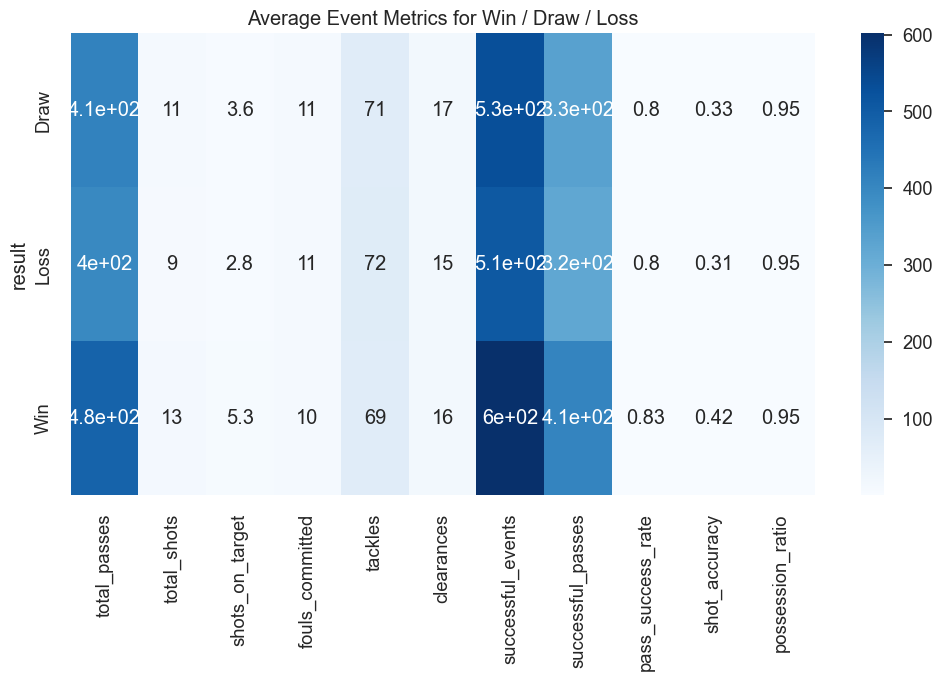

In [5]:
event_means = df.groupby("result")[
    ["total_passes", "total_shots", "shots_on_target",
     "fouls_committed", "tackles", "clearances",
     "successful_events", "successful_passes",
     "pass_success_rate", "shot_accuracy", "possession_ratio"]
].mean()

plt.figure(figsize=(12,6))
sns.heatmap(event_means, annot=True, cmap="Blues")
plt.title("Average Event Metrics for Win / Draw / Loss")
plt.show()

Winning teams show noticeably higher values in total passes, total shots, shots on target, and successful passes, indicating stronger attacking performance and ball control, while losing teams do not differ much defensively—highlighting that offensive quality is the main factor separating wins from losses.

# Correlation Heatmap: Event Features vs Match Result

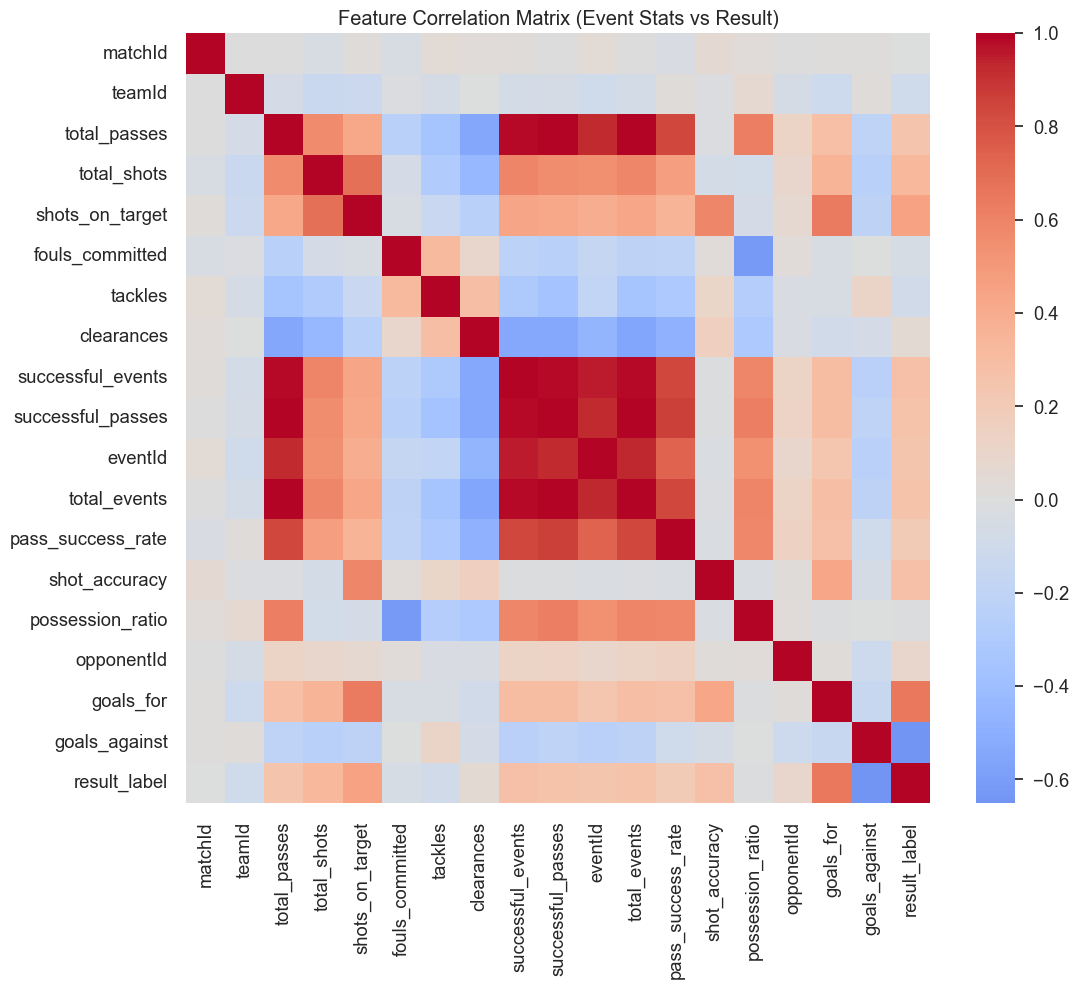

In [6]:
plt.figure(figsize=(12,10))
sns.heatmap(
    df.corr(numeric_only=True),
    cmap="coolwarm",
    center=0,
    annot=False
)
plt.title("Feature Correlation Matrix (Event Stats vs Result)")
plt.show()

The correlation heatmap shows that shots on target, total shots, successful passes, and possession ratio have the strongest positive relationships with winning, while goals against is strongly negatively correlated—highlighting that offensive effectiveness and ball control are the key predictors of match outcomes.

# Pass Success Rate vs Result

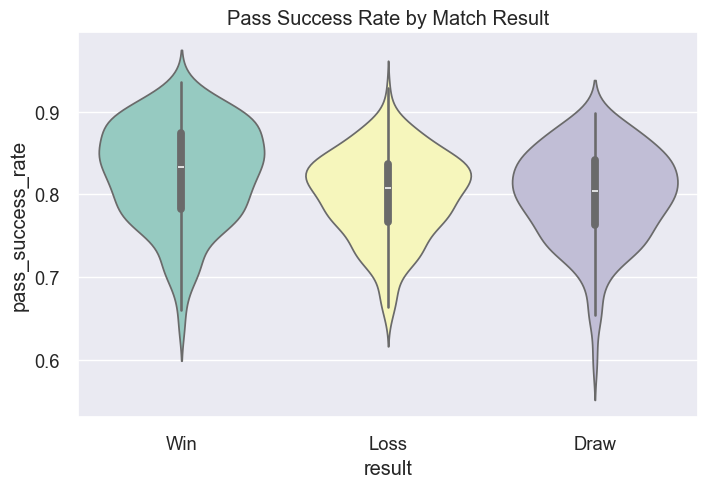

In [7]:
plt.figure(figsize=(8,5))
sns.violinplot(
    data=df,
    x="result",
    y="pass_success_rate",
    hue="result",             
    palette="Set3",
    legend=False           
)
plt.title("Pass Success Rate by Match Result")
plt.show()

Winning teams consistently show higher pass success rates, indicating stronger ball retention and more effective ball circulation, while losing teams tend to have lower passing efficiency, reflecting disrupted possession and reduced control over the match.

# Shot Accuracy vs Goals Scored

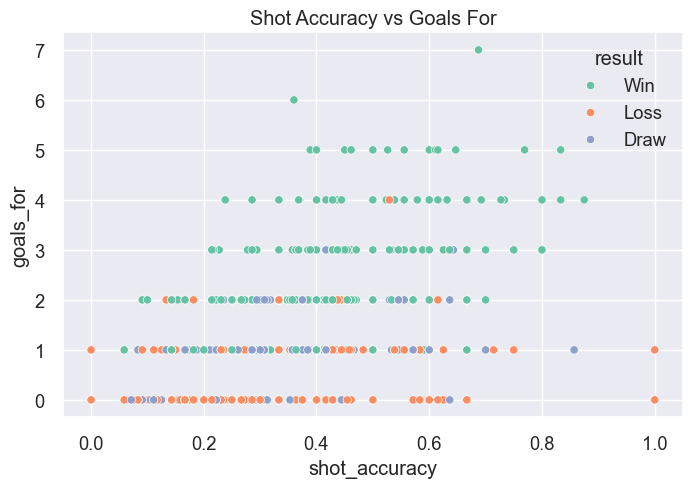

In [8]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="shot_accuracy", y="goals_for", hue="result", palette="Set2")
plt.title("Shot Accuracy vs Goals For")
plt.show()

Teams with higher shot accuracy tend to score more goals, and most high-accuracy, high-goal performances belong to winning teams. This shows that finishing efficiency is a major factor separating wins from draws and losses.

# Possession Ratio vs Match Outcome

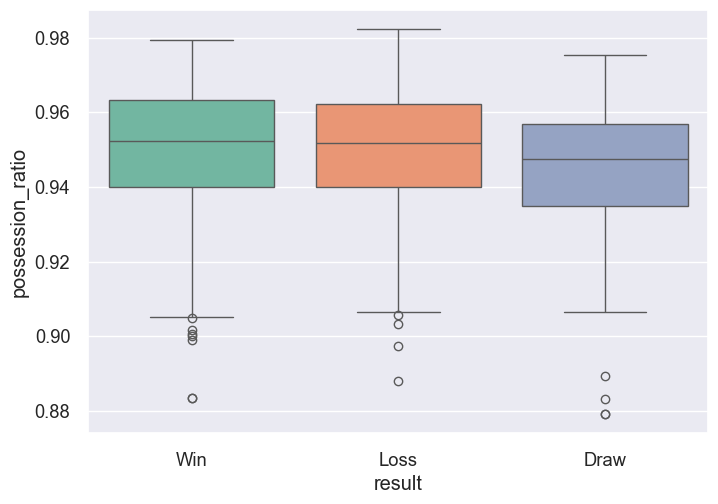

In [9]:
sns.boxplot(
    data=df,
    x="result",
    y="possession_ratio",
    hue="result",
    palette="Set2",
    legend=False
)
plt.show()

Possession ratios remain high across all outcomes, but winning teams tend to maintain slightly higher and more stable possession than losing teams, suggesting that consistent ball control provides a small but meaningful advantage in securing positive results.

# Event-Type Influence Plot (SHOTS vs PASSES)

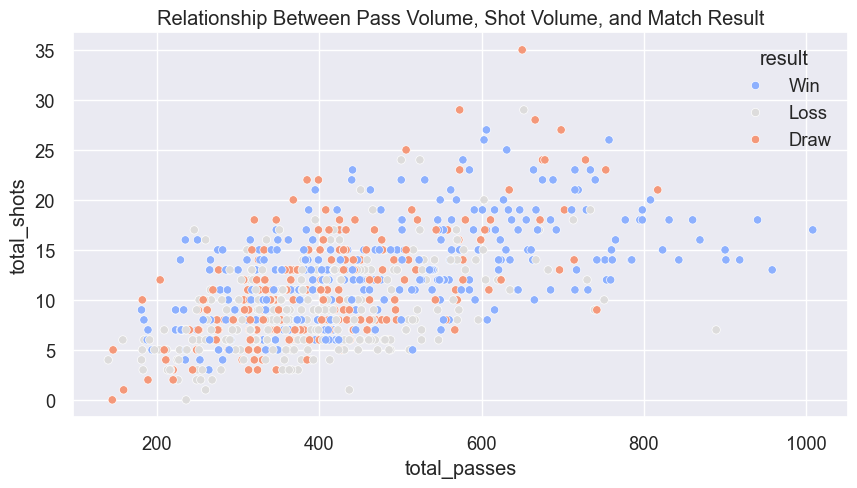

In [10]:
plt.figure(figsize=(10,5))
sns.scatterplot(
    data=df, x="total_passes", y="total_shots",
    hue="result", palette="coolwarm"
)
plt.title("Relationship Between Pass Volume, Shot Volume, and Match Result")
plt.show()


Teams that complete more passes tend to generate more shots overall, and winning teams appear most frequently in the upper-right region of the plot, showing that high passing volume combined with higher shot production is strongly associated with better match outcomes.

# Defensive Actions vs Match Outcome (Tackles + Clearances)

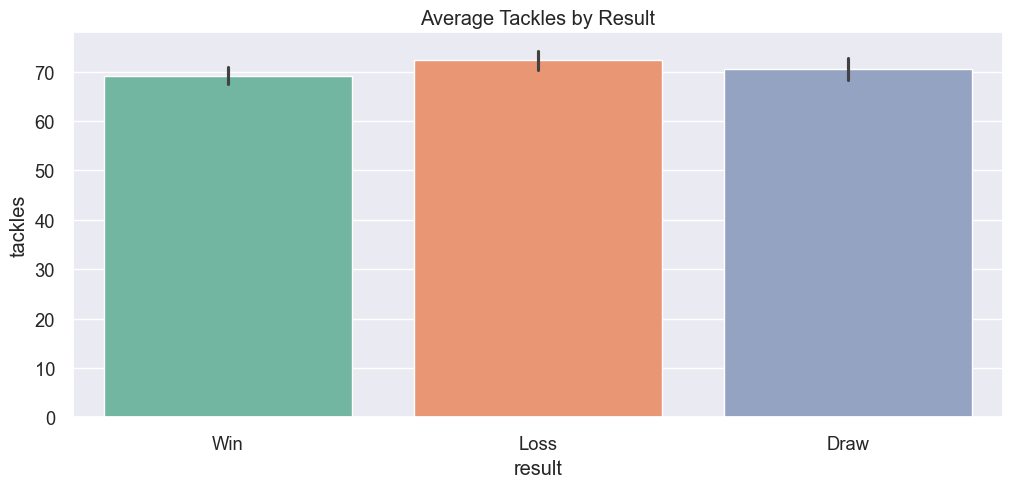

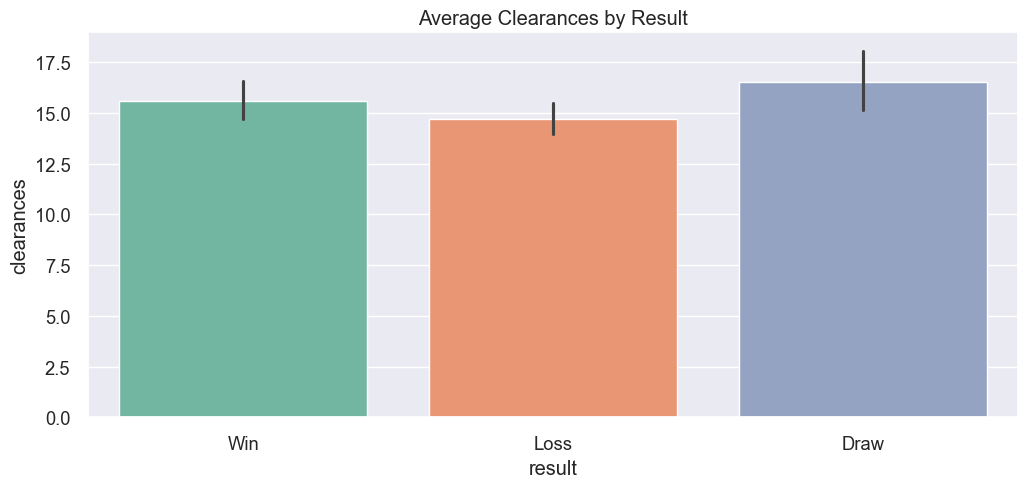

In [11]:
plt.figure(figsize=(12,5))
sns.barplot(
    data=df,
    x="result",
    y="tackles",
    hue="result",      
    palette="Set2",
    legend=False
)
plt.title("Average Tackles by Result")
plt.show()

plt.figure(figsize=(12,5))
sns.barplot(
    data=df,
    x="result",
    y="clearances",
    hue="result",
    palette="Set2",
    legend=False
)
plt.title("Average Clearances by Result")
plt.show()

Losing teams tend to make slightly more tackles, while draws show the highest number of clearances, suggesting that teams under pressure defend more aggressively. Winning teams typically show lower defensive counts, indicating they spend less time defending and more time controlling possession.